In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def broken_power_law(x, alpha, beta, x_0, x_min):
    N = (x_0*((1-(x_min/x_0)**(1-alpha))/(1-alpha)-1/(1-beta)))**(-1)
    return np.piecewise(x, [x < x_0, x >= x_0], [lambda x: N*(x/x_0)**(-alpha), lambda x: N*(x/x_0)**(-beta)])

def power_law(x, alpha, x_min):
    f_0 = (alpha-1)/x_min
    return f_0*(x/x_min)**(-alpha)

def generate_broken_power_law(p, alpha, beta, x_0, x_min):
    y_min = x_min/x_0
    f_0   = (x_0*((1-y_min**(1-alpha))/(1-alpha)-1/(1-beta)))**(-1)
    p_0   = f_0*x_0*(1-y_min**(1-alpha))/(1-alpha)
    return np.piecewise(p, [p < p_0, p >= p_0], [lambda p: x_0*(p*(1-alpha)/(f_0*x_0)+y_min**(1-alpha))**(1/(1-alpha)), 
                                                 lambda p: x_0*((p-1)*(1-beta)/(f_0*x_0))**(1/(1-beta))])
    
def generate_power_law(p, alpha, x_min):
    f_0 = (alpha-1)/x_min
    return x_min*((p*(1-alpha))/(f_0*x_min)+1)**(1/(1-alpha))

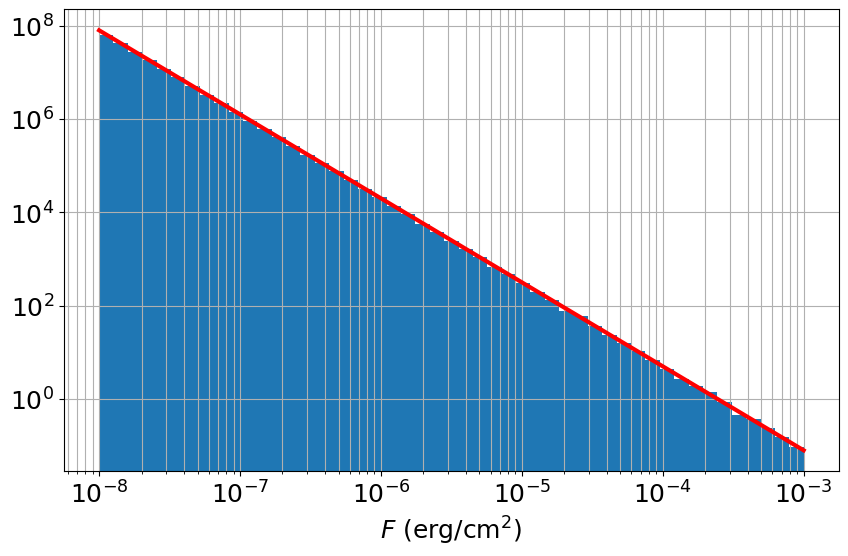

In [5]:
alpha = 1.8
beta = 2.5
x_0 = 1e-06
x_min = 1e-08
x_max = 1e-03

r = np.random.random(size=1000000)
simulated_fluences = generate_power_law(r, alpha, x_min)
fluences = np.logspace(np.log10(x_min), np.log10(x_max), 256)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fluences, power_law(fluences, alpha, x_min), c='red', lw=3)
freqs, bins, _ = ax.hist(simulated_fluences, bins=np.logspace(np.log10(x_min), np.log10(x_max), 50), density=True)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$F$ (erg/cm$^2$)', size=18)
ax.loglog()
ax.grid(which='both')
plt.show()

In [6]:
np.cumsum(freqs*np.diff(bins))[-1]

np.float64(1.0000000000000002)

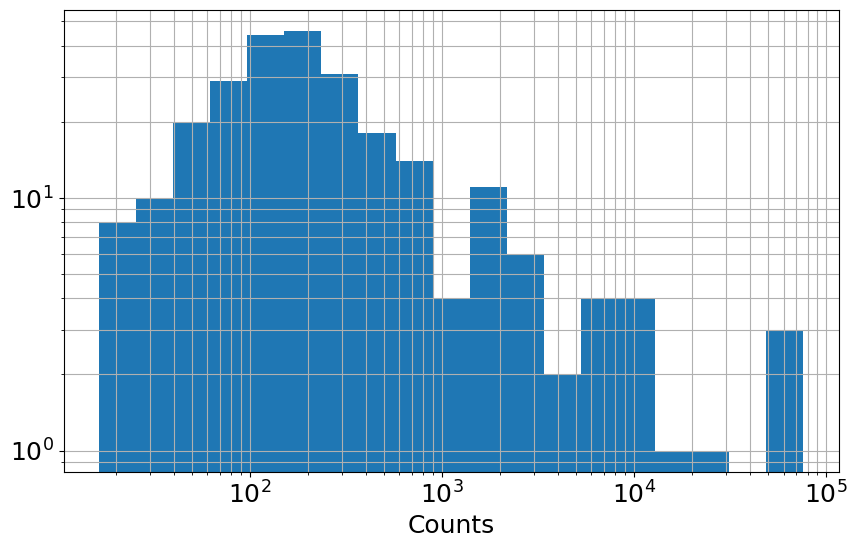

In [7]:
from functools import partial

def generate_peak_counts(generated_fluence, k_values):
    fluence   = generated_fluence(np.random.rand())
    k_sampled = np.random.choice(k_values)
    counts    = (10.**(-k_sampled))*fluence
    return counts 

path_k_values_file_batse = "../lc_pulse_avalanche/log10_fluence_over_counts_CGRO_BATSE.txt"
k_values_batse = np.loadtxt(path_k_values_file_batse, unpack = True)

generated_fluence = partial(generate_power_law, alpha=alpha, x_min=x_min)

peak_counts = np.zeros_like(fluences)
for i in range(len(fluences)):
    peak_counts[i] = generate_peak_counts(generated_fluence, k_values_batse)
    
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(peak_counts, bins=np.logspace(np.log10(peak_counts.min()), np.log10(peak_counts.max()), 20))
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'Counts', size=18)
ax.loglog()
ax.grid(which='both')
plt.show()

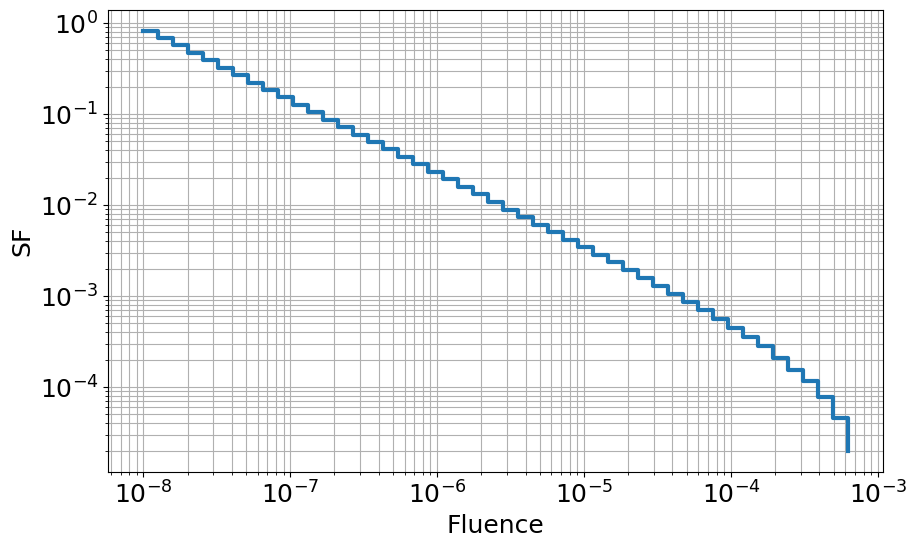

In [8]:
cdf = np.cumsum(freqs*np.diff(bins))
sf = 1 - cdf

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.step(bins[:-2], sf[:-1], where='post', lw=3)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'Fluence', size=18)
ax.set_ylabel(r'SF', size=18)
ax.loglog()
ax.grid(which='both')
plt.show()

lam value too large
concurrent.futures.process._RemoteTraceback:
"""
Traceback (most recent call last):
  File "/home/maistrello/.conda/envs/pygad3/lib/python3.10/concurrent/futures/process.py", line 243, in _process_worker
    r = call_item.fn(*call_item.args, **call_item.kwargs)
  File "/home/maistrello/.conda/envs/pygad3/lib/python3.10/concurrent/futures/process.py", line 202, in _process_chunk
    return [fn(*args) for args in chunk]
  File "/home/maistrello/.conda/envs/pygad3/lib/python3.10/concurrent/futures/process.py", line 202, in <listcomp>
    return [fn(*args) for args in chunk]
  File "/home/maistrello/geneticgrbs/genetic_algorithm/geneticgrbs.py", line 392, in fitness_func
    grb_list_sim = generate_GRBs(# number of simulated GRBs to produce:
  File "/home/maistrello/geneticgrbs/statistical_test/statistical_test.py", line 3177, in generate_GRBs
    lc.generate_avalanche(seed=None)
  File "/home/maistrello/geneticgrbs/lc_pulse_avalanche/avalanche.py", line 578, in generate_avalanche
    self._plot_lc         = np.random.poisson(self._modelbkg).astype('float')   # total COUNTS (signal+noise) with Poisson
  File "numpy/random/mtrand.pyx", line 3669, in numpy.random.mtrand.RandomState.poisson
  File "_common.pyx", line 883, in numpy.random._common.disc
  File "_common.pyx", line 680, in numpy.random._common.discrete_broadcast_d
  File "_common.pyx", line 411, in numpy.random._common.check_array_constraint
ValueError: lam value too large
"""
1191125.1631522507